In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('archive/Loan.csv',)
print(df.head())


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972     

# Nettoyage


In [2]:
df1 = df
df1['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')
df1.dtypes

ApplicationDate               datetime64[ns]
Age                                    int64
AnnualIncome                           int64
CreditScore                            int64
EmploymentStatus                      object
EducationLevel                        object
Experience                             int64
LoanAmount                             int64
LoanDuration                           int64
MaritalStatus                         object
NumberOfDependents                     int64
HomeOwnershipStatus                   object
MonthlyDebtPayments                    int64
CreditCardUtilizationRate            float64
NumberOfOpenCreditLines                int64
NumberOfCreditInquiries                int64
DebtToIncomeRatio                    float64
BankruptcyHistory                      int64
LoanPurpose                           object
PreviousLoanDefaults                   int64
PaymentHistory                         int64
LengthOfCreditHistory                  int64
SavingsAcc

# Suppression des Colonnes que l'on trouve pas pertinentes

In [3]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'ApplicationDate', 
    'LoanPurpose', 
    'EducationLevel', 
    'TotalAssets', 
    'TotalLiabilities', 
    'MonthlyIncome', 
    'UtilityBillsPaymentHistory', 
    'JobTenure'
]

# Suppression des colonnes du DataFrame
df1 = df1.drop(columns=colonnes_a_supprimer, errors='ignore')

# Vérifier le DataFrame après suppression
print(df1.head())


   Age  AnnualIncome  CreditScore EmploymentStatus  Experience  LoanAmount  \
0   45         39948          617         Employed          22       13152   
1   38         39709          628         Employed          15       26045   
2   47         40724          570         Employed          26       17627   
3   58         69084          545         Employed          34       37898   
4   37        103264          594         Employed          17        9184   

   LoanDuration MaritalStatus  NumberOfDependents HomeOwnershipStatus  ...  \
0            48       Married                   2                 Own  ...   
1            48        Single                   1            Mortgage  ...   
2            36       Married                   2                Rent  ...   
3            96        Single                   1            Mortgage  ...   
4            36       Married                   1            Mortgage  ...   

   LengthOfCreditHistory  SavingsAccountBalance  CheckingAccou

In [4]:
df1.EmploymentStatus.value_counts()

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64

In [5]:
# mettre employment status en Category
df1['EmploymentStatus'] = df1['EmploymentStatus'].astype('category')
df1['EmploymentStatus'].head()

0    Employed
1    Employed
2    Employed
3    Employed
4    Employed
Name: EmploymentStatus, dtype: category
Categories (3, object): ['Employed', 'Self-Employed', 'Unemployed']

In [6]:
df1

,Age,AnnualIncome,CreditScore,EmploymentStatus,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,22,13152,48,Married,2,Own,...,9,7632,1202,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,15,26045,48,Single,1,Mortgage,...,9,4627,3460,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,26,17627,36,Married,2,Rent,...,22,886,895,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,34,37898,96,Single,1,Mortgage,...,10,1675,1217,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,17,9184,36,Married,1,Mortgage,...,27,1555,4981,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,19,24521,36,Married,3,Rent,...,7,235,3429,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,Employed,33,25818,36,Married,5,Rent,...,28,6910,183,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,44,48958,645,Employed,20,37033,72,Married,3,Mortgage,...,8,2175,746,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,60,41025,560,Employed,36,14760,72,Married,3,Own,...,13,3037,260,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


<Axes: xlabel='AnnualIncome', ylabel='LoanAmount'>

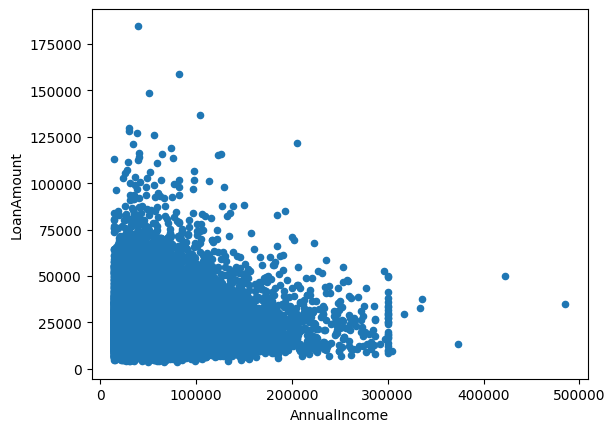

In [7]:
# Liste des colonnes à conserver
colonnes_utiles = [
    'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 
    'LoanAmount', 'LoanDuration', 'DebtToIncomeRatio', 
    'PreviousLoanDefaults', 'PaymentHistory', 'InterestRate', 
    'LoanApproved', 'RiskScore'
]

# Ne conserver que les colonnes utiles dans le DataFrame
df1_reduit = df[colonnes_utiles]

# Vérifier les premières lignes du DataFrame réduit
df1_reduit.head()

df1_reduit.plot.scatter(x='AnnualIncome', y='LoanAmount')



Text(0, 0.5, "Taux d'accord de prêt")

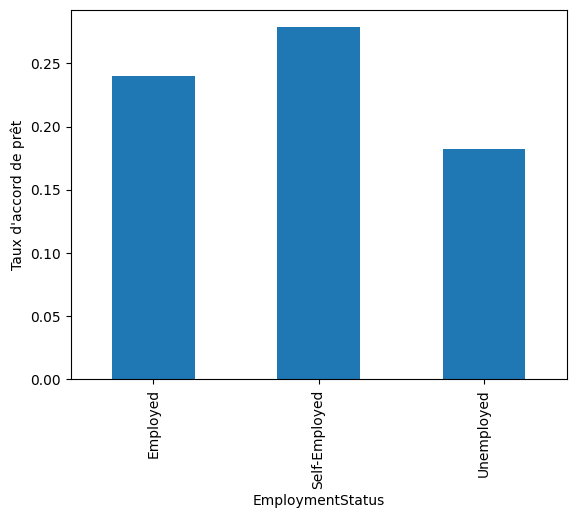

In [8]:
# afficher avec un graphique en barre colonne employment status et le taux d'accord de prêt
df1_reduit.groupby('EmploymentStatus')['LoanApproved'].mean().plot(kind='bar')
plt.ylabel('Taux d\'accord de prêt')




In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  # Exemple de modèle
from sklearn.metrics import accuracy_score

# 1. Vérification des valeurs manquantes
df1_reduit.isnull().sum()

# 2. Séparer les caractéristiques (X) et la variable cible (y)
X = df1_reduit.drop(['LoanApproved', 'RiskScore'], axis=1)  # Ici on utilise LoanApproved comme cible pour la classification
y = df1_reduit['LoanApproved']

# 3. Encodage des variables catégorielles et normalisation
# Identifier les colonnes numériques et catégorielles
colonnes_numeriques = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'DebtToIncomeRatio', 'PreviousLoanDefaults', 'PaymentHistory', 'InterestRate']
colonnes_categoriques = ['EmploymentStatus']

# 4. Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Créer un pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colonnes_numeriques),
        ('cat', OneHotEncoder(), colonnes_categoriques)
    ])

# 6. Créer un pipeline complet
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# 6. Entraîner le modèle
model.fit(X_train, y_train)

# 7. Faire des prédictions et évaluer le modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.90


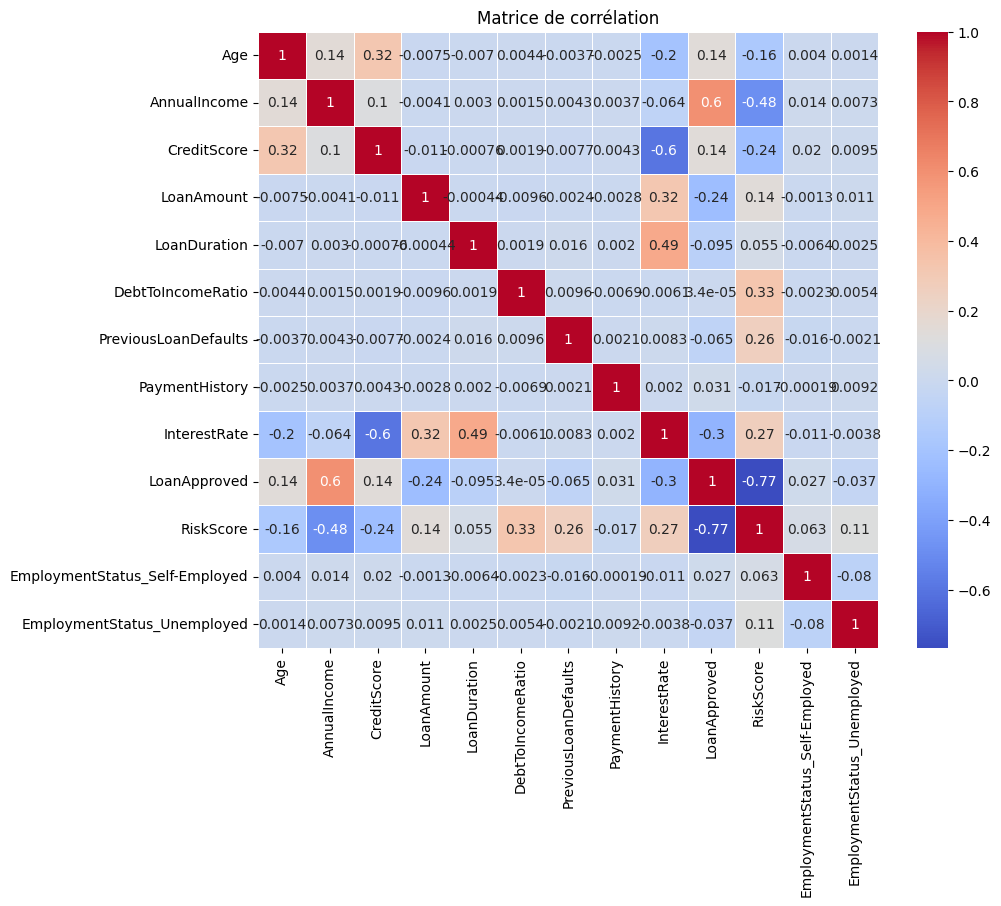

In [11]:
import seaborn as sns

# Convertir les variables catégorielles en dummies (0 et 1)
df1_reduit_encoded = pd.get_dummies(df1_reduit, drop_first=True)

# Calculer la matrice de corrélation
correlation_matrix = df1_reduit_encoded.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()


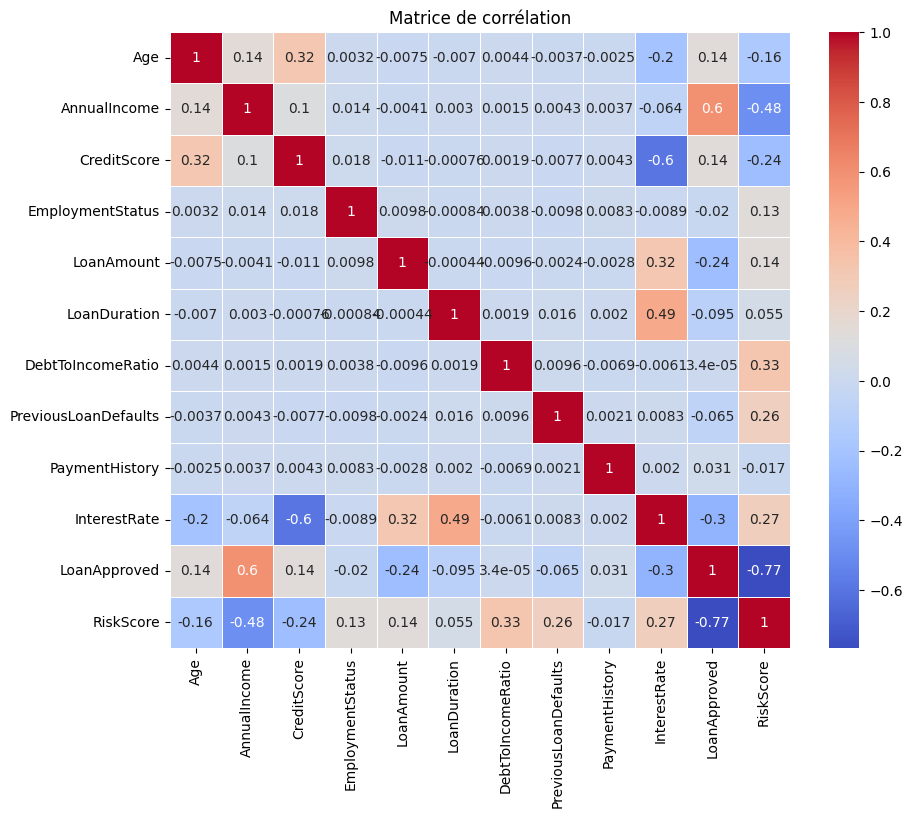

In [13]:
# Exclure la colonne catégorielle avant de calculer la corrélation
df1_reduit_numerique = df1_reduit.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
correlation_matrix = df1_reduit_numerique.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()
